In [1]:
import matplotlib.pyplot as plt
import json
import pandas as pd

In [2]:
collection = 'CRWEAPONS-e5ab49'
collection = 'CRMYTH-546419'

In [3]:
with open(f'{collection}_nfts.json') as f:
    data = json.load(f)

In [4]:
df = {
    'thumbnailUrl': [], 
    'identifier': [],
    'id': [], 
    'name': [], 
    'description': [], 
    'metadataUrl': [],
    'collection': [],
    'weaponType': [],
    'owner': [],
    'ticker': [],
    'priceCurrency': [],
    'priceAmount': [],
    'dynamicUrl': [],
    'xp': [],
    'wear': [],
    'level': [],
    'starLevel': [],
    'damage': [],
    'reloadTime': [],
    'ammo': [],
    'range': []
}
for k, v in data.items():
    df['thumbnailUrl'].append(v['media'][0]['thumbnailUrl'])
    df['identifier'].append(k)
    df['id'].append(v['metadata']['data']['id'])
    df['name'].append(v['metadata']['data']['name'])
    df['description'].append(v['metadata']['data']['description'])
    df['metadataUrl'].append(v['metadata']['url'])
    df['collection'].append(v['metadata']['data']['attributes'][0]['value'])
    df['weaponType'].append(v['metadata']['data']['attributes'][1]['value'])
    df['owner'].append(v['owner'])
    df['ticker'].append(v['ticker'])
    df['priceCurrency'].append(v['price']['currency'])
    df['priceAmount'].append(v['price']['amount'])
    df['dynamicUrl'].append(v['dynamic']['url'])
    df['xp'].append(v['dynamic']['data']['xp'])
    df['wear'].append(v['dynamic']['data']['wear'])
    df['level'].append(v['dynamic']['data']['level'])
    df['starLevel'].append(v['dynamic']['data']['starLevel'])
    df['damage'].append(v['dynamic']['data']['stats'][0]['value'])
    df['reloadTime'].append(v['dynamic']['data']['stats'][1]['value'])
    df['ammo'].append(v['dynamic']['data']['stats'][2]['value'])
    df['range'].append(v['dynamic']['data']['stats'][3]['value'])
df = pd.DataFrame(df)

In [5]:
import dtale

In [ ]:
d = dtale.show(df)
d.open_browser()

2024-04-05 22:05:50,152 - INFO     - Executing shutdown due to inactivity...
2024-04-05 22:05:50,156 - INFO     - Executing shutdown...
2024-04-05 22:05:50,157 - INFO     - Not running with the Werkzeug Server, exiting by searching gc for BaseWSGIServer


In [7]:
stats = df.drop_duplicates(['level', 'starLevel', 'weaponType']).filter(['level', 'starLevel', 'weaponType', 'damage', 'reloadTime', 'range', 'ammo'])
stats

,level,starLevel,weaponType,damage,reloadTime,range,ammo
0,20,6,Railgun,2862,2.40,11.0,2
1,1,2,Boomstick,2300,2.10,9.0,3
2,1,6,Tesla Gun,1200,2.70,9.5,2
3,1,5,Blaster,2000,2.75,10.5,3
4,1,3,Blaster,1700,2.75,10.5,3
...,...,...,...,...,...,...,...
1879,6,2,Railgun,1160,2.40,10.5,2
1896,10,4,Tesla Gun,1540,2.70,9.5,2
1971,2,4,Mortar Gun,1457,3.00,8.5,3
1972,15,5,Tesla Gun,2320,2.70,9.5,2


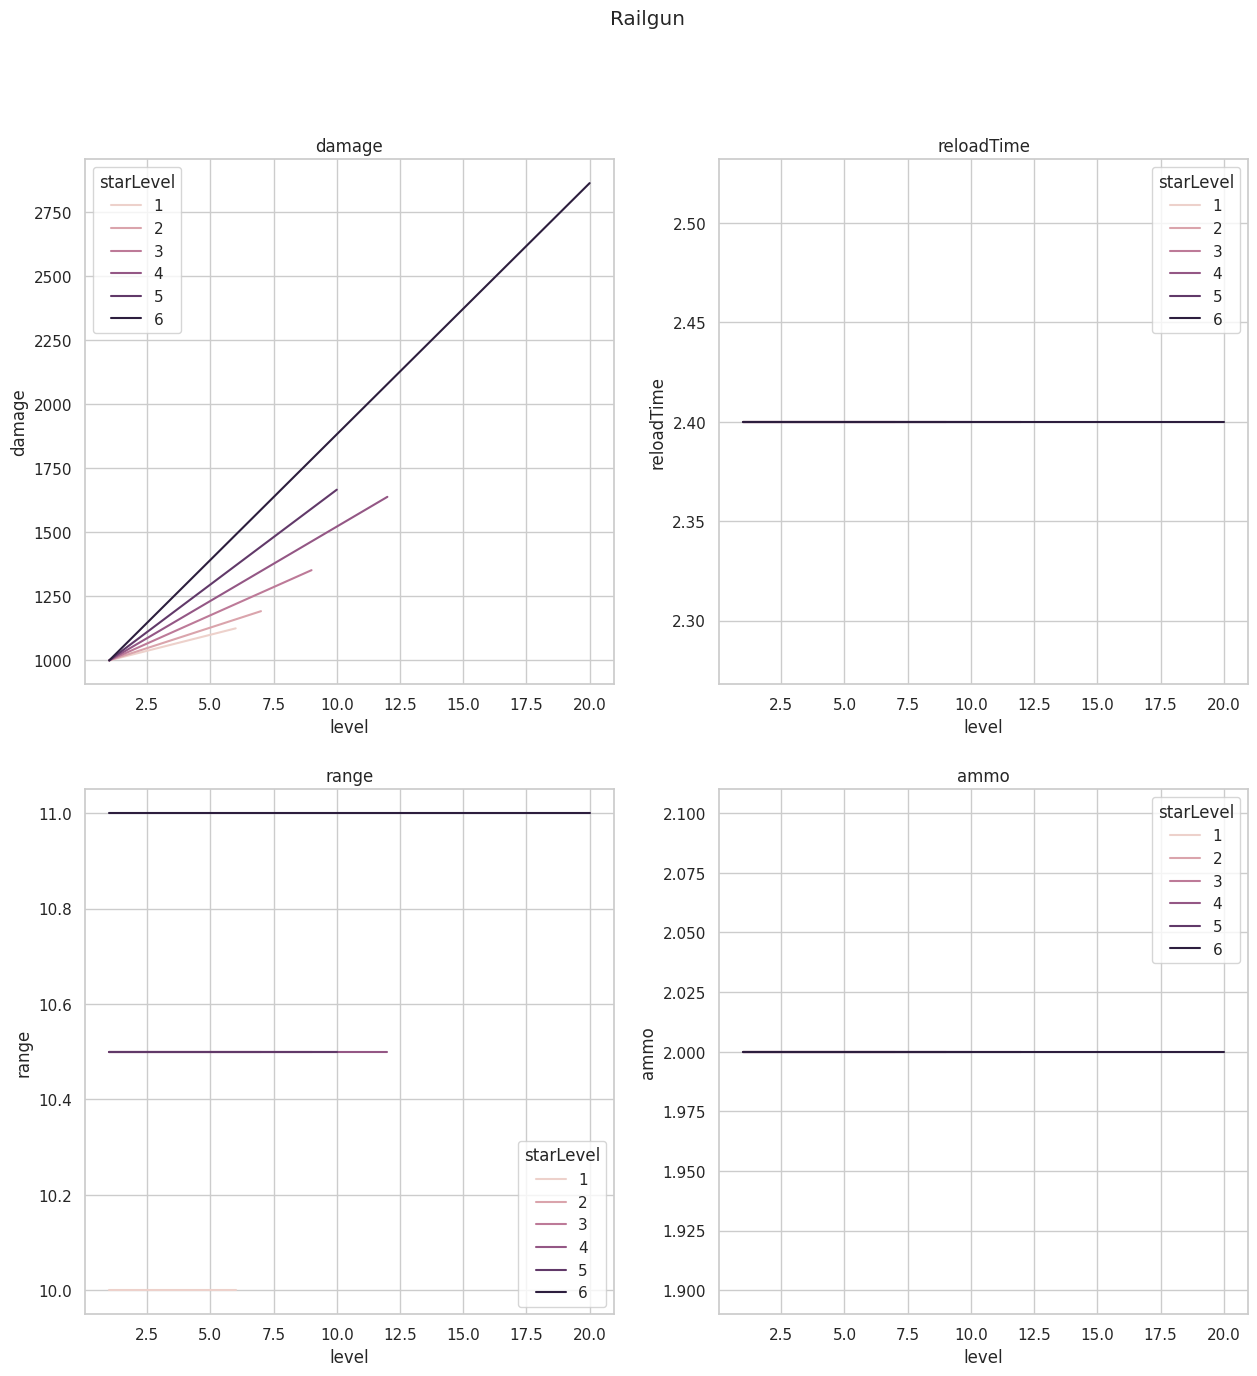

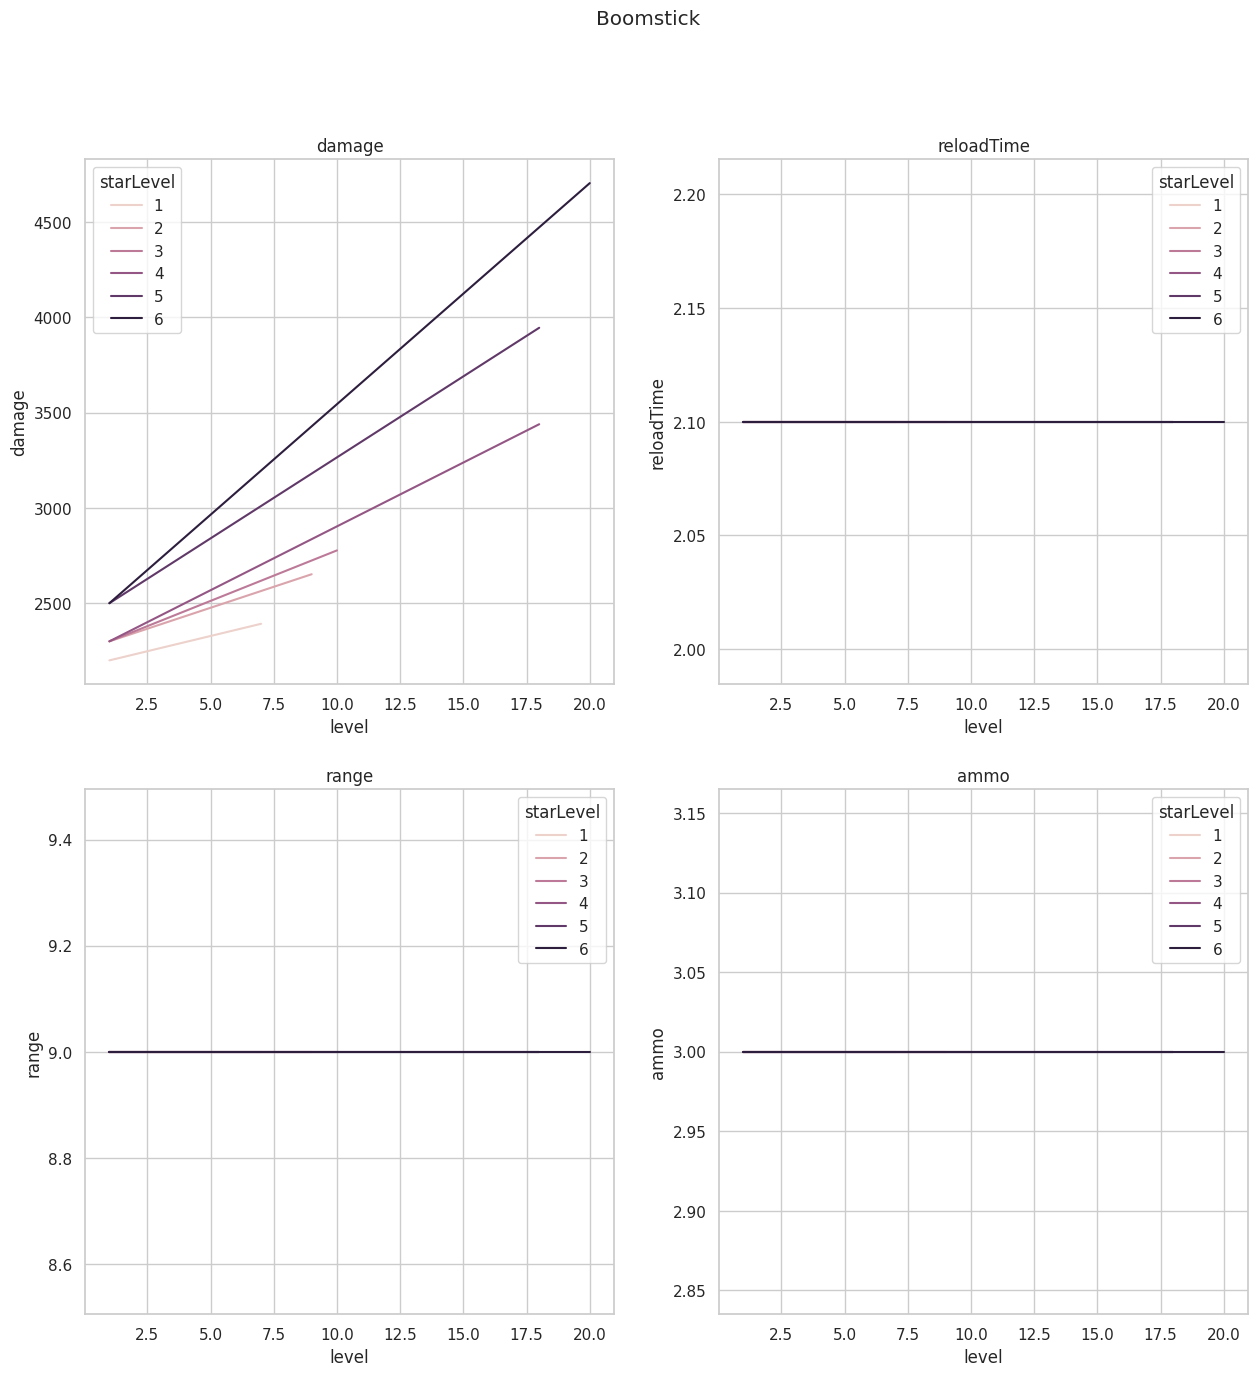

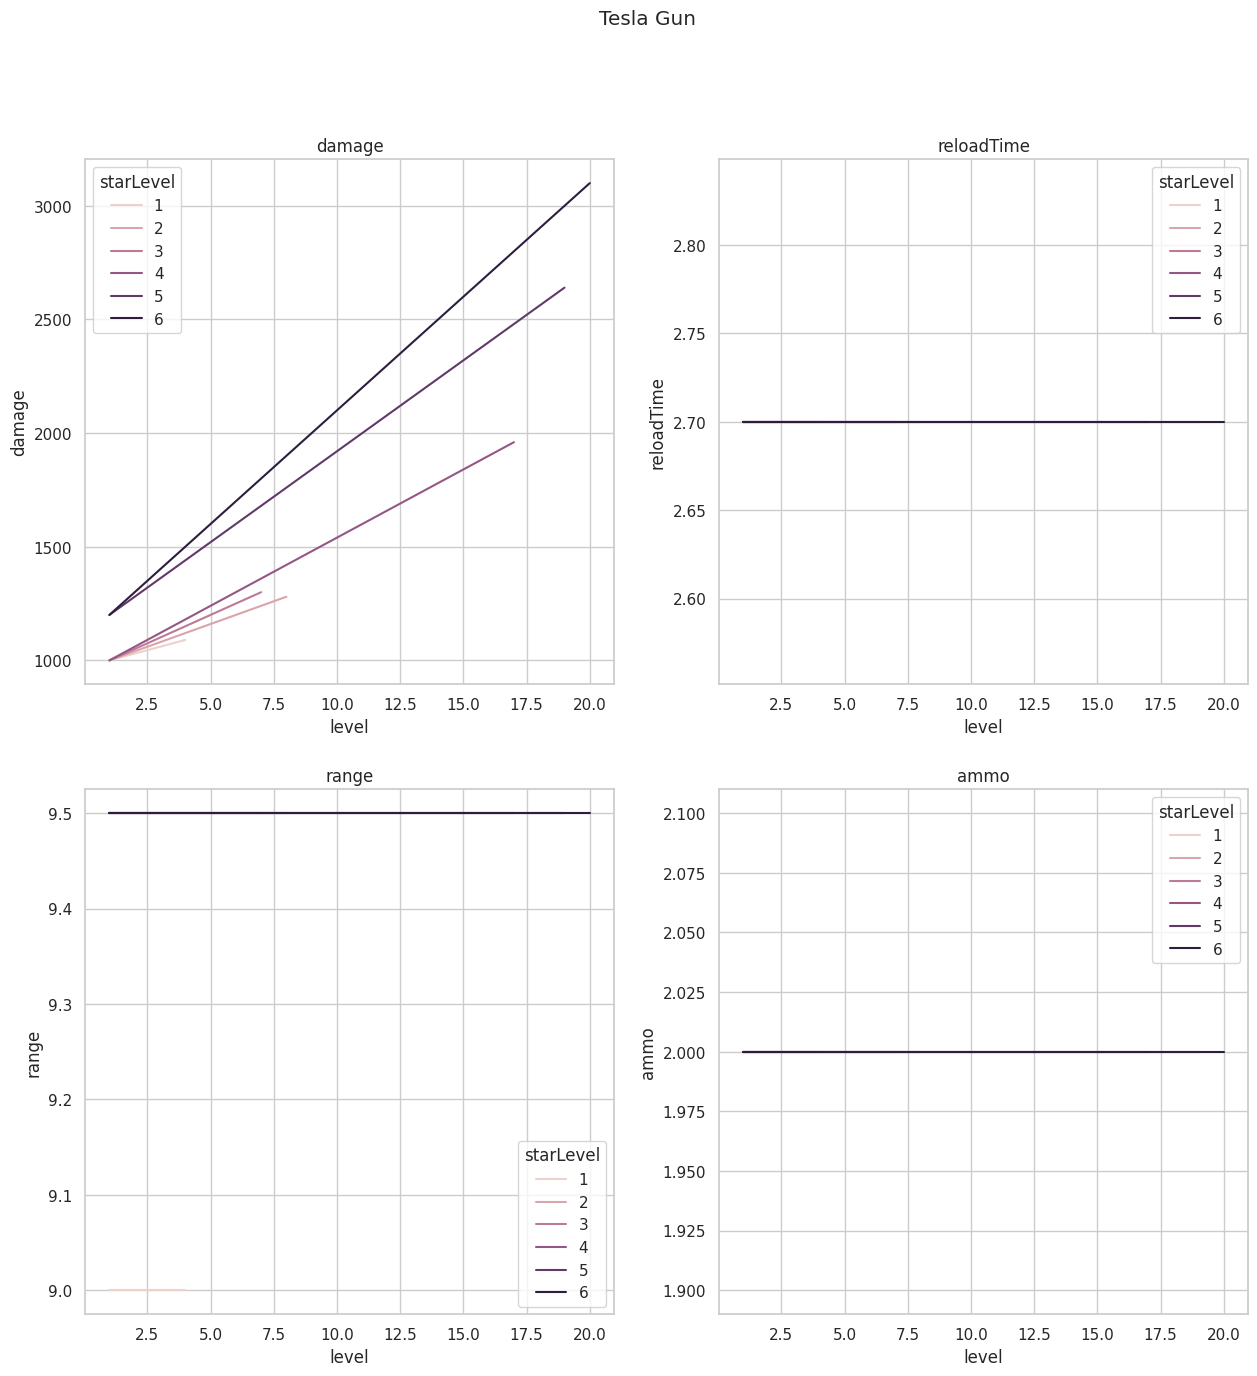

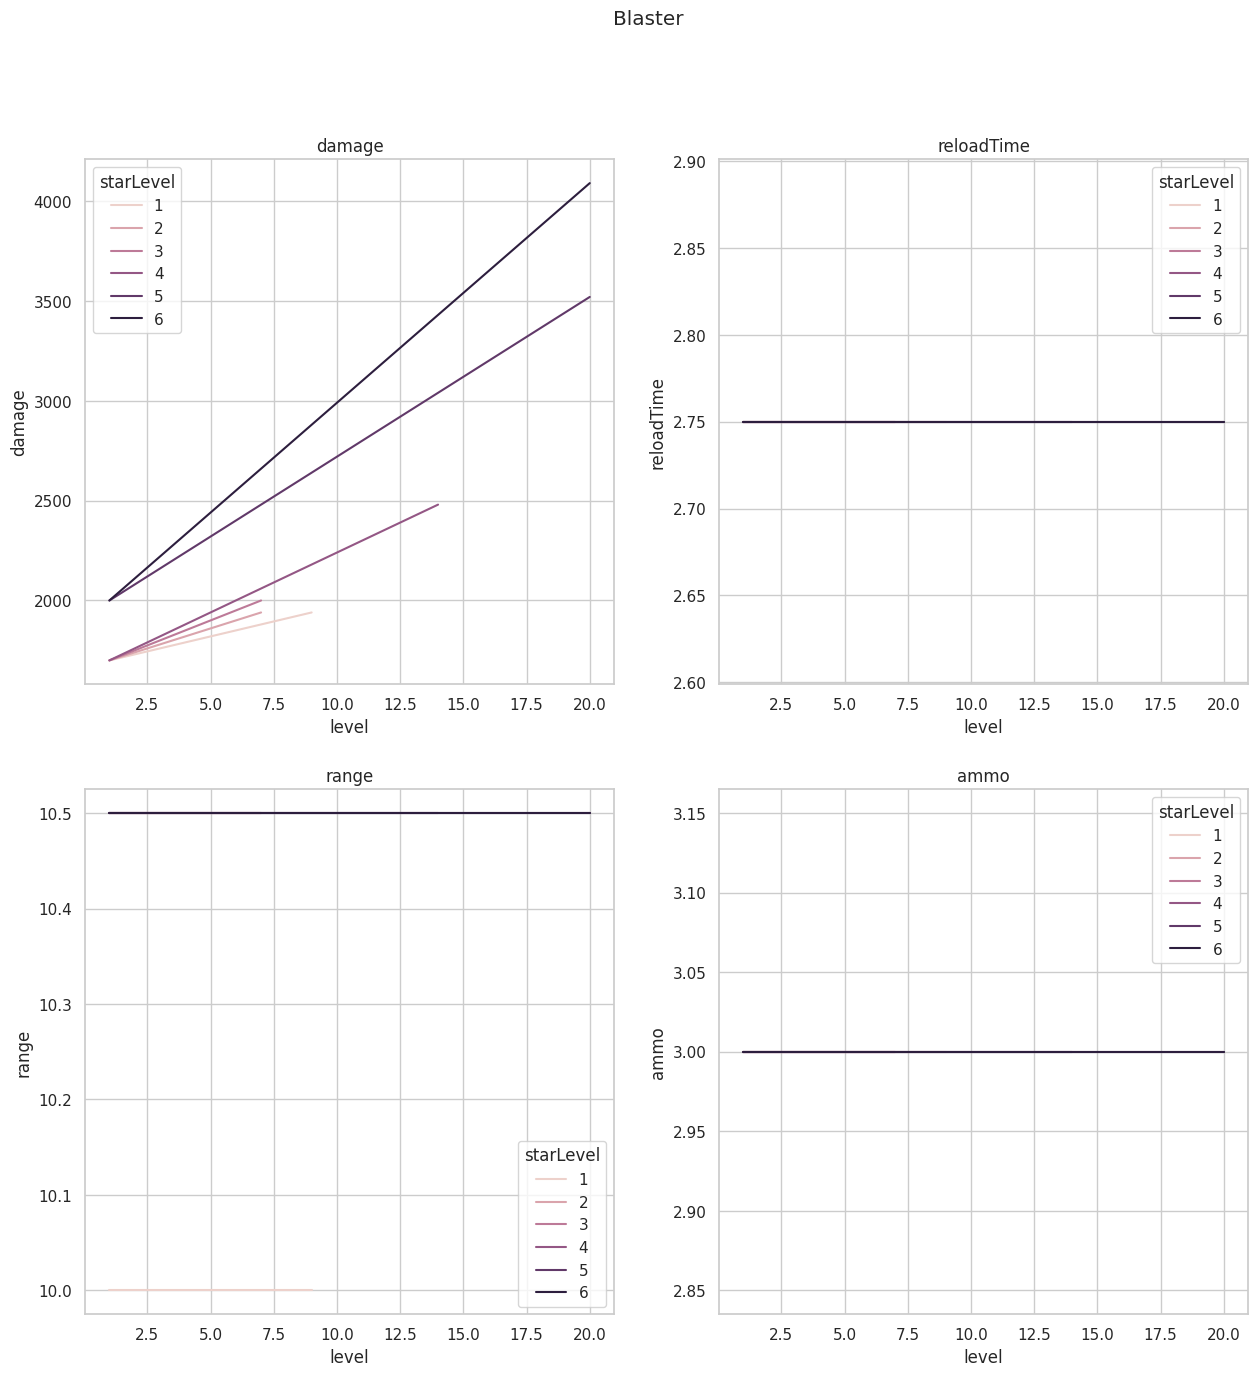

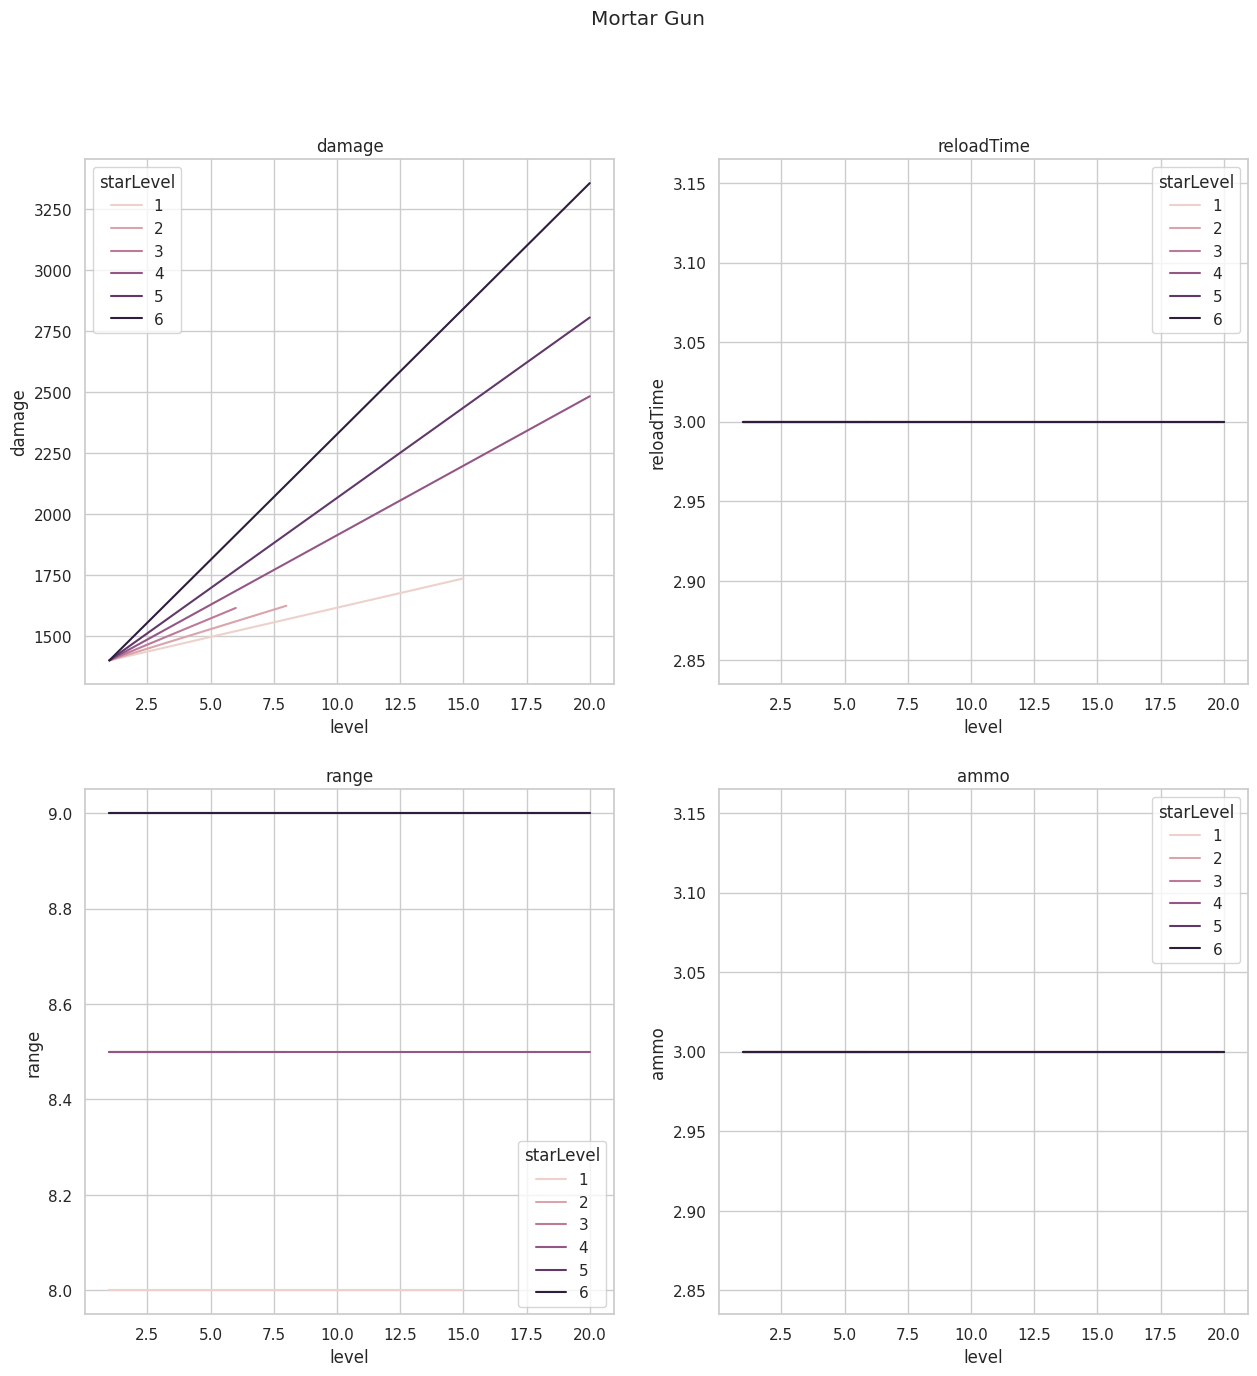

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
for weaponType in df['weaponType'].unique():
    fig, axs = plt.subplots(2, 2, figsize=(15, 15))
    fig.suptitle(weaponType)
    for i, stat in enumerate(['damage', 'reloadTime', 'range', 'ammo']):
        sns.lineplot(data=stats[stats['weaponType'] == weaponType], x='level', y=stat, hue='starLevel', ax=axs[i//2, i%2])
        axs[i//2, i%2].set_title(stat)
    plt.show()

<Axes: xlabel='starLevel'>

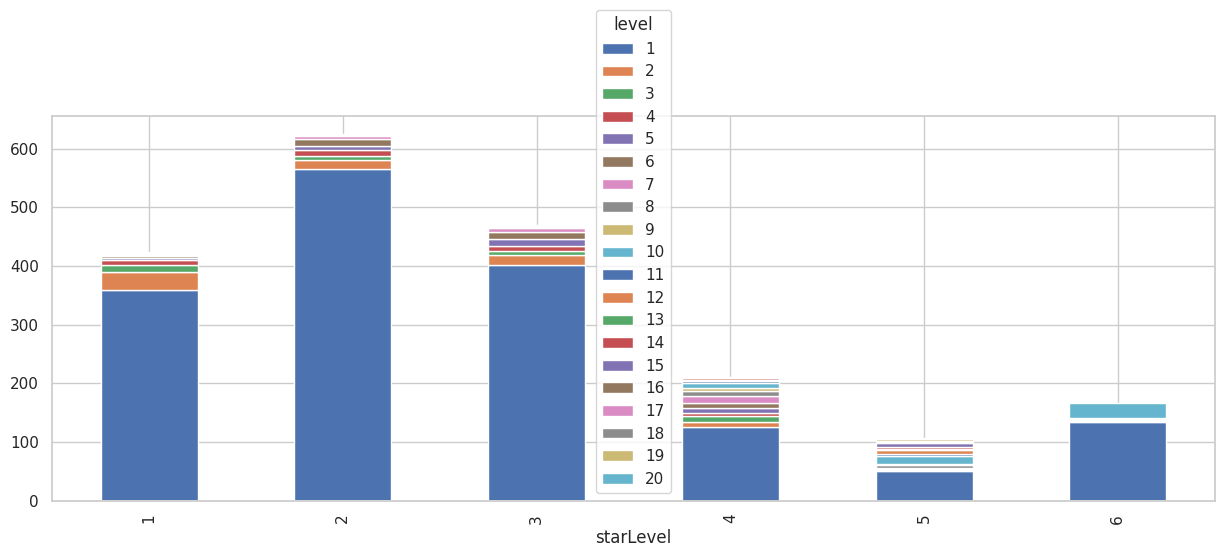

In [9]:
df.groupby(['starLevel', 'level']).size().unstack().plot(kind='bar', stacked=True, figsize=(15, 5))

In [10]:
xoxno = df[df['priceAmount'].notnull()]
xoxno

,thumbnailUrl,identifier,id,name,description,metadataUrl,collection,weaponType,owner,ticker,...,priceAmount,dynamicUrl,xp,wear,level,starLevel,damage,reloadTime,ammo,range
6,https://media.elrond.com/nfts/thumbnail/CRWEAP...,CRWEAPONS-e5ab49-071e,1837,Tesla Gun X,It fires an electric orb that deals damage to ...,https://metadata.cantinaroyale.io/metadata/CRW...,ARSENAL-X,Tesla Gun,erd1qqqqqqqqqqqqqpgq6wegs2xkypfpync8mn2sa5cmpq...,CRWEAPONS-e5ab49,...,0.299,https://metadata.cantinaroyale.io/dynamic/CRWE...,0,0.0,1,1,1000,2.7,2,9.0
11,https://media.elrond.com/nfts/thumbnail/CRWEAP...,CRWEAPONS-e5ab49-0279,633,Boomstick-X,It fires a wide spread of pellets to a medium ...,https://metadata.cantinaroyale.io/metadata/CRW...,ARSENAL-X,Boomstick,erd1qqqqqqqqqqqqqpgq6wegs2xkypfpync8mn2sa5cmpq...,CRWEAPONS-e5ab49,...,2.100,https://metadata.cantinaroyale.io/dynamic/CRWE...,0,0.0,1,2,2300,2.1,3,9.0
12,https://media.elrond.com/nfts/thumbnail/CRWEAP...,CRWEAPONS-e5ab49-0e93,3746,Tesla Gun X,It fires an electric orb that deals damage to ...,https://metadata.cantinaroyale.io/metadata/CRW...,ARSENAL-X,Tesla Gun,erd1qqqqqqqqqqqqqpgq6wegs2xkypfpync8mn2sa5cmpq...,CRWEAPONS-e5ab49,...,0.102,https://metadata.cantinaroyale.io/dynamic/CRWE...,0,0.0,1,1,1000,2.7,2,9.0
23,https://media.elrond.com/nfts/thumbnail/CRWEAP...,CRWEAPONS-e5ab49-044c,1100,Mortar Gun X,"It fires a rocket high into the air, dealing a...",https://metadata.cantinaroyale.io/metadata/CRW...,ARSENAL-X,Mortar Gun,erd1qqqqqqqqqqqqqpgq6wegs2xkypfpync8mn2sa5cmpq...,CRWEAPONS-e5ab49,...,2.890,https://metadata.cantinaroyale.io/dynamic/CRWE...,6120,12.9,7,4,1742,3.0,3,8.5
25,https://media.elrond.com/nfts/thumbnail/CRWEAP...,CRWEAPONS-e5ab49-08d0,2271,Mortar Gun X,"It fires a rocket high into the air, dealing a...",https://metadata.cantinaroyale.io/metadata/CRW...,ARSENAL-X,Mortar Gun,erd1qqqqqqqqqqqqqpgq6wegs2xkypfpync8mn2sa5cmpq...,CRWEAPONS-e5ab49,...,0.500,https://metadata.cantinaroyale.io/dynamic/CRWE...,7,0.1,1,2,1400,3.0,3,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1956,https://media.elrond.com/nfts/thumbnail/CRWEAP...,CRWEAPONS-e5ab49-09ed,2556,Mortar Gun X,"It fires a rocket high into the air, dealing a...",https://metadata.cantinaroyale.io/metadata/CRW...,ARSENAL-X,Mortar Gun,erd1qqqqqqqqqqqqqpgq6wegs2xkypfpync8mn2sa5cmpq...,CRWEAPONS-e5ab49,...,0.270,https://metadata.cantinaroyale.io/dynamic/CRWE...,0,0.0,1,2,1400,3.0,3,8.5
1958,https://media.elrond.com/nfts/thumbnail/CRWEAP...,CRWEAPONS-e5ab49-09fa,2569,Railgun-X,It fires a high-energy projectile that gains p...,https://metadata.cantinaroyale.io/metadata/CRW...,ARSENAL-X,Railgun,erd1qqqqqqqqqqqqqpgq6wegs2xkypfpync8mn2sa5cmpq...,CRWEAPONS-e5ab49,...,0.250,https://metadata.cantinaroyale.io/dynamic/CRWE...,0,0.0,1,2,1000,2.4,2,10.5
1977,https://media.elrond.com/nfts/thumbnail/CRWEAP...,CRWEAPONS-e5ab49-0b58,2920,Tesla Gun X,It fires an electric orb that deals damage to ...,https://metadata.cantinaroyale.io/metadata/CRW...,ARSENAL-X,Tesla Gun,erd1qqqqqqqqqqqqqpgq6wegs2xkypfpync8mn2sa5cmpq...,CRWEAPONS-e5ab49,...,0.320,https://metadata.cantinaroyale.io/dynamic/CRWE...,0,0.0,1,3,1000,2.7,2,9.5
1988,https://media.elrond.com/nfts/thumbnail/CRWEAP...,CRWEAPONS-e5ab49-072a,1849,Mortar Gun X,"It fires a rocket high into the air, dealing a...",https://metadata.cantinaroyale.io/metadata/CRW...,ARSENAL-X,Mortar Gun,erd1qqqqqqqqqqqqqpgq6wegs2xkypfpync8mn2sa5cmpq...,CRWEAPONS-e5ab49,...,0.210,https://metadata.cantinaroyale.io/dynamic/CRWE...,0,0.0,1,2,1400,3.0,3,8.5


In [11]:
xoxno1 = xoxno[xoxno['starLevel'] == 1]
xoxno1 = xoxno1.sort_values(by='priceAmount')
xoxno1

,thumbnailUrl,identifier,id,name,description,metadataUrl,collection,weaponType,owner,ticker,...,priceAmount,dynamicUrl,xp,wear,level,starLevel,damage,reloadTime,ammo,range
145,https://media.elrond.com/nfts/thumbnail/CRWEAP...,CRWEAPONS-e5ab49-115e,4458,Tesla Gun X,It fires an electric orb that deals damage to ...,https://metadata.cantinaroyale.io/metadata/CRW...,ARSENAL-X,Tesla Gun,erd1qqqqqqqqqqqqqpgq6wegs2xkypfpync8mn2sa5cmpq...,CRWEAPONS-e5ab49,...,0.0780,https://metadata.cantinaroyale.io/dynamic/CRWE...,0,0.0,1,1,1000,2.7,2,9.0
793,https://media.elrond.com/nfts/thumbnail/CRWEAP...,CRWEAPONS-e5ab49-1131,4413,Tesla Gun X,It fires an electric orb that deals damage to ...,https://metadata.cantinaroyale.io/metadata/CRW...,ARSENAL-X,Tesla Gun,erd1qqqqqqqqqqqqqpgq6wegs2xkypfpync8mn2sa5cmpq...,CRWEAPONS-e5ab49,...,0.0795,https://metadata.cantinaroyale.io/dynamic/CRWE...,0,0.0,1,1,1000,2.7,2,9.0
855,https://media.elrond.com/nfts/thumbnail/CRWEAP...,CRWEAPONS-e5ab49-113a,4422,Tesla Gun X,It fires an electric orb that deals damage to ...,https://metadata.cantinaroyale.io/metadata/CRW...,ARSENAL-X,Tesla Gun,erd1qqqqqqqqqqqqqpgq6wegs2xkypfpync8mn2sa5cmpq...,CRWEAPONS-e5ab49,...,0.0800,https://metadata.cantinaroyale.io/dynamic/CRWE...,0,0.0,1,1,1000,2.7,2,9.0
1140,https://media.elrond.com/nfts/thumbnail/CRWEAP...,CRWEAPONS-e5ab49-1106,4370,Mortar Gun X,"It fires a rocket high into the air, dealing a...",https://metadata.cantinaroyale.io/metadata/CRW...,ARSENAL-X,Mortar Gun,erd1qqqqqqqqqqqqqpgq6wegs2xkypfpync8mn2sa5cmpq...,CRWEAPONS-e5ab49,...,0.0850,https://metadata.cantinaroyale.io/dynamic/CRWE...,0,0.0,1,1,1400,3.0,3,8.0
389,https://media.elrond.com/nfts/thumbnail/CRWEAP...,CRWEAPONS-e5ab49-1083,4240,Mortar Gun X,"It fires a rocket high into the air, dealing a...",https://metadata.cantinaroyale.io/metadata/CRW...,ARSENAL-X,Mortar Gun,erd1qqqqqqqqqqqqqpgq6wegs2xkypfpync8mn2sa5cmpq...,CRWEAPONS-e5ab49,...,0.0860,https://metadata.cantinaroyale.io/dynamic/CRWE...,0,0.0,1,1,1400,3.0,3,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123,https://media.elrond.com/nfts/thumbnail/CRWEAP...,CRWEAPONS-e5ab49-fb,251,Railgun-X,It fires a high-energy projectile that gains p...,https://metadata.cantinaroyale.io/metadata/CRW...,ARSENAL-X,Railgun,erd1qqqqqqqqqqqqqpgq6wegs2xkypfpync8mn2sa5cmpq...,CRWEAPONS-e5ab49,...,2.1000,https://metadata.cantinaroyale.io/dynamic/CRWE...,0,0.0,1,1,1000,2.4,2,10.0
296,https://media.elrond.com/nfts/thumbnail/CRWEAP...,CRWEAPONS-e5ab49-a5,165,Tesla Gun X,It fires an electric orb that deals damage to ...,https://metadata.cantinaroyale.io/metadata/CRW...,ARSENAL-X,Tesla Gun,erd1qqqqqqqqqqqqqpgq6wegs2xkypfpync8mn2sa5cmpq...,CRWEAPONS-e5ab49,...,2.1000,https://metadata.cantinaroyale.io/dynamic/CRWE...,0,0.0,1,1,1000,2.7,2,9.0
1898,https://media.elrond.com/nfts/thumbnail/CRWEAP...,CRWEAPONS-e5ab49-e1,225,Railgun-X,It fires a high-energy projectile that gains p...,https://metadata.cantinaroyale.io/metadata/CRW...,ARSENAL-X,Railgun,erd1qqqqqqqqqqqqqpgq6wegs2xkypfpync8mn2sa5cmpq...,CRWEAPONS-e5ab49,...,2.1000,https://metadata.cantinaroyale.io/dynamic/CRWE...,0,0.0,1,1,1000,2.4,2,10.0
1498,https://media.elrond.com/nfts/thumbnail/CRWEAP...,CRWEAPONS-e5ab49-29,41,Railgun-X,It fires a high-energy projectile that gains p...,https://metadata.cantinaroyale.io/metadata/CRW...,ARSENAL-X,Railgun,erd1qqqqqqqqqqqqqpgq6wegs2xkypfpync8mn2sa5cmpq...,CRWEAPONS-e5ab49,...,2.1000,https://metadata.cantinaroyale.io/dynamic/CRWE...,0,0.0,1,1,1000,2.4,2,10.0


In [12]:
xoxno2 = xoxno[xoxno['starLevel'] == 2]
xoxno2 = xoxno2.sort_values(by='priceAmount')
xoxno2

,thumbnailUrl,identifier,id,name,description,metadataUrl,collection,weaponType,owner,ticker,...,priceAmount,dynamicUrl,xp,wear,level,starLevel,damage,reloadTime,ammo,range
414,https://media.elrond.com/nfts/thumbnail/CRWEAP...,CRWEAPONS-e5ab49-10af,4283,Mortar Gun X,"It fires a rocket high into the air, dealing a...",https://metadata.cantinaroyale.io/metadata/CRW...,ARSENAL-X,Mortar Gun,erd1qqqqqqqqqqqqqpgq6wegs2xkypfpync8mn2sa5cmpq...,CRWEAPONS-e5ab49,...,0.08,https://metadata.cantinaroyale.io/dynamic/CRWE...,0,0.0,1,2,1400,3.0,3,8.5
850,https://media.elrond.com/nfts/thumbnail/CRWEAP...,CRWEAPONS-e5ab49-1154,4448,Mortar Gun X,"It fires a rocket high into the air, dealing a...",https://metadata.cantinaroyale.io/metadata/CRW...,ARSENAL-X,Mortar Gun,erd1qqqqqqqqqqqqqpgq6wegs2xkypfpync8mn2sa5cmpq...,CRWEAPONS-e5ab49,...,0.10,https://metadata.cantinaroyale.io/dynamic/CRWE...,0,0.0,1,2,1400,3.0,3,8.5
896,https://media.elrond.com/nfts/thumbnail/CRWEAP...,CRWEAPONS-e5ab49-0f5a,3942,Mortar Gun X,"It fires a rocket high into the air, dealing a...",https://metadata.cantinaroyale.io/metadata/CRW...,ARSENAL-X,Mortar Gun,erd1qqqqqqqqqqqqqpgq6wegs2xkypfpync8mn2sa5cmpq...,CRWEAPONS-e5ab49,...,0.11,https://metadata.cantinaroyale.io/dynamic/CRWE...,0,0.0,1,2,1400,3.0,3,8.5
432,https://media.elrond.com/nfts/thumbnail/CRWEAP...,CRWEAPONS-e5ab49-0a2b,2618,Mortar Gun X,"It fires a rocket high into the air, dealing a...",https://metadata.cantinaroyale.io/metadata/CRW...,ARSENAL-X,Mortar Gun,erd1qqqqqqqqqqqqqpgq6wegs2xkypfpync8mn2sa5cmpq...,CRWEAPONS-e5ab49,...,0.12,https://metadata.cantinaroyale.io/dynamic/CRWE...,0,0.0,1,2,1400,3.0,3,8.5
1246,https://media.elrond.com/nfts/thumbnail/CRWEAP...,CRWEAPONS-e5ab49-0b61,2927,Tesla Gun X,It fires an electric orb that deals damage to ...,https://metadata.cantinaroyale.io/metadata/CRW...,ARSENAL-X,Tesla Gun,erd1qqqqqqqqqqqqqpgq6wegs2xkypfpync8mn2sa5cmpq...,CRWEAPONS-e5ab49,...,0.12,https://metadata.cantinaroyale.io/dynamic/CRWE...,0,0.0,1,2,1000,2.7,2,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,https://media.elrond.com/nfts/thumbnail/CRWEAP...,CRWEAPONS-e5ab49-04ff,1294,Mortar Gun X,"It fires a rocket high into the air, dealing a...",https://metadata.cantinaroyale.io/metadata/CRW...,ARSENAL-X,Mortar Gun,erd1qqqqqqqqqqqqqpgq6wegs2xkypfpync8mn2sa5cmpq...,CRWEAPONS-e5ab49,...,1.50,https://metadata.cantinaroyale.io/dynamic/CRWE...,0,0.0,1,2,1400,3.0,3,8.5
1644,https://media.elrond.com/nfts/thumbnail/CRWEAP...,CRWEAPONS-e5ab49-03fb,1019,Tesla Gun X,It fires an electric orb that deals damage to ...,https://metadata.cantinaroyale.io/metadata/CRW...,ARSENAL-X,Tesla Gun,erd1qqqqqqqqqqqqqpgq6wegs2xkypfpync8mn2sa5cmpq...,CRWEAPONS-e5ab49,...,2.00,https://metadata.cantinaroyale.io/dynamic/CRWE...,0,0.0,1,2,1000,2.7,2,9.5
1786,https://media.elrond.com/nfts/thumbnail/CRWEAP...,CRWEAPONS-e5ab49-0341,833,Tesla Gun X,It fires an electric orb that deals damage to ...,https://metadata.cantinaroyale.io/metadata/CRW...,ARSENAL-X,Tesla Gun,erd1qqqqqqqqqqqqqpgq6wegs2xkypfpync8mn2sa5cmpq...,CRWEAPONS-e5ab49,...,2.00,https://metadata.cantinaroyale.io/dynamic/CRWE...,0,0.0,1,2,1000,2.7,2,9.5
220,https://media.elrond.com/nfts/thumbnail/CRWEAP...,CRWEAPONS-e5ab49-9d,157,Tesla Gun X,It fires an electric orb that deals damage to ...,https://metadata.cantinaroyale.io/metadata/CRW...,ARSENAL-X,Tesla Gun,erd1qqqqqqqqqqqqqpgq6wegs2xkypfpync8mn2sa5cmpq...,CRWEAPONS-e5ab49,...,2.10,https://metadata.cantinaroyale.io/dynamic/CRWE...,0,0.0,1,2,1000,2.7,2,9.5


In [13]:
xoxno3 = xoxno[xoxno['starLevel'] == 3]
xoxno3 = xoxno3.sort_values(by='priceAmount')
xoxno3

,thumbnailUrl,identifier,id,name,description,metadataUrl,collection,weaponType,owner,ticker,...,priceAmount,dynamicUrl,xp,wear,level,starLevel,damage,reloadTime,ammo,range
1052,https://media.elrond.com/nfts/thumbnail/CRWEAP...,CRWEAPONS-e5ab49-0ffe,4106,Boomstick-X,It fires a wide spread of pellets to a medium ...,https://metadata.cantinaroyale.io/metadata/CRW...,ARSENAL-X,Boomstick,erd1qqqqqqqqqqqqqpgq6wegs2xkypfpync8mn2sa5cmpq...,CRWEAPONS-e5ab49,...,0.250,https://metadata.cantinaroyale.io/dynamic/CRWE...,0,0.0,1,3,2300,2.10,3,9.0
1212,https://media.elrond.com/nfts/thumbnail/CRWEAP...,CRWEAPONS-e5ab49-0a73,2690,Railgun-X,It fires a high-energy projectile that gains p...,https://metadata.cantinaroyale.io/metadata/CRW...,ARSENAL-X,Railgun,erd1qqqqqqqqqqqqqpgq6wegs2xkypfpync8mn2sa5cmpq...,CRWEAPONS-e5ab49,...,0.290,https://metadata.cantinaroyale.io/dynamic/CRWE...,0,0.0,1,3,1000,2.40,2,10.5
974,https://media.elrond.com/nfts/thumbnail/CRWEAP...,CRWEAPONS-e5ab49-1118,4388,Blaster-X,It fires straight long-range bullets to a long...,https://metadata.cantinaroyale.io/metadata/CRW...,ARSENAL-X,Blaster,erd1qqqqqqqqqqqqqpgq6wegs2xkypfpync8mn2sa5cmpq...,CRWEAPONS-e5ab49,...,0.300,https://metadata.cantinaroyale.io/dynamic/CRWE...,0,0.0,1,3,1700,2.75,3,10.5
1128,https://media.elrond.com/nfts/thumbnail/CRWEAP...,CRWEAPONS-e5ab49-1169,4469,Boomstick-X,It fires a wide spread of pellets to a medium ...,https://metadata.cantinaroyale.io/metadata/CRW...,ARSENAL-X,Boomstick,erd1qqqqqqqqqqqqqpgq6wegs2xkypfpync8mn2sa5cmpq...,CRWEAPONS-e5ab49,...,0.300,https://metadata.cantinaroyale.io/dynamic/CRWE...,0,0.0,1,3,2300,2.10,3,9.0
1824,https://media.elrond.com/nfts/thumbnail/CRWEAP...,CRWEAPONS-e5ab49-0fc6,4050,Mortar Gun X,"It fires a rocket high into the air, dealing a...",https://metadata.cantinaroyale.io/metadata/CRW...,ARSENAL-X,Mortar Gun,erd1qqqqqqqqqqqqqpgq6wegs2xkypfpync8mn2sa5cmpq...,CRWEAPONS-e5ab49,...,0.319,https://metadata.cantinaroyale.io/dynamic/CRWE...,0,0.0,1,3,1400,3.00,3,8.5
1977,https://media.elrond.com/nfts/thumbnail/CRWEAP...,CRWEAPONS-e5ab49-0b58,2920,Tesla Gun X,It fires an electric orb that deals damage to ...,https://metadata.cantinaroyale.io/metadata/CRW...,ARSENAL-X,Tesla Gun,erd1qqqqqqqqqqqqqpgq6wegs2xkypfpync8mn2sa5cmpq...,CRWEAPONS-e5ab49,...,0.320,https://metadata.cantinaroyale.io/dynamic/CRWE...,0,0.0,1,3,1000,2.70,2,9.5
1792,https://media.elrond.com/nfts/thumbnail/CRWEAP...,CRWEAPONS-e5ab49-085c,2155,Railgun-X,It fires a high-energy projectile that gains p...,https://metadata.cantinaroyale.io/metadata/CRW...,ARSENAL-X,Railgun,erd1qqqqqqqqqqqqqpgq6wegs2xkypfpync8mn2sa5cmpq...,CRWEAPONS-e5ab49,...,0.340,https://metadata.cantinaroyale.io/dynamic/CRWE...,0,0.0,1,3,1000,2.40,2,10.5
1408,https://media.elrond.com/nfts/thumbnail/CRWEAP...,CRWEAPONS-e5ab49-1152,4446,Boomstick-X,It fires a wide spread of pellets to a medium ...,https://metadata.cantinaroyale.io/metadata/CRW...,ARSENAL-X,Boomstick,erd1qqqqqqqqqqqqqpgq6wegs2xkypfpync8mn2sa5cmpq...,CRWEAPONS-e5ab49,...,0.350,https://metadata.cantinaroyale.io/dynamic/CRWE...,0,0.0,1,3,2300,2.10,3,9.0
381,https://media.elrond.com/nfts/thumbnail/CRWEAP...,CRWEAPONS-e5ab49-0b28,2871,Boomstick-X,It fires a wide spread of pellets to a medium ...,https://metadata.cantinaroyale.io/metadata/CRW...,ARSENAL-X,Boomstick,erd1qqqqqqqqqqqqqpgq6wegs2xkypfpync8mn2sa5cmpq...,CRWEAPONS-e5ab49,...,0.350,https://metadata.cantinaroyale.io/dynamic/CRWE...,0,0.0,1,3,2300,2.10,3,9.0
1420,https://media.elrond.com/nfts/thumbnail/CRWEAP...,CRWEAPONS-e5ab49-09ee,2557,Boomstick-X,It fires a wide spread of pellets to a medium ...,https://metadata.cantinaroyale.io/metadata/CRW...,ARSENAL-X,Boomstick,erd1qqqqqqqqqqqqqpgq6wegs2xkypfpync8mn2sa5cmpq...,CRWEAPONS-e5ab49,...,0.360,https://metadata.cantinaroyale.io/dynamic/CRWE...,0,0.0,1,3,2300,2.10,3,9.0


In [14]:
xoxno4 = xoxno[xoxno['starLevel'] == 4]
xoxno4 = xoxno4.sort_values(by='priceAmount')
xoxno4

,thumbnailUrl,identifier,id,name,description,metadataUrl,collection,weaponType,owner,ticker,...,priceAmount,dynamicUrl,xp,wear,level,starLevel,damage,reloadTime,ammo,range
537,https://media.elrond.com/nfts/thumbnail/CRWEAP...,CRWEAPONS-e5ab49-0ee4,3827,Mortar Gun X,"It fires a rocket high into the air, dealing a...",https://metadata.cantinaroyale.io/metadata/CRW...,ARSENAL-X,Mortar Gun,erd1qqqqqqqqqqqqqpgq6wegs2xkypfpync8mn2sa5cmpq...,CRWEAPONS-e5ab49,...,0.80,https://metadata.cantinaroyale.io/dynamic/CRWE...,16473,38.1,10,4,1913,3.00,3,8.5
1029,https://media.elrond.com/nfts/thumbnail/CRWEAP...,CRWEAPONS-e5ab49-10bb,4295,Railgun-X,It fires a high-energy projectile that gains p...,https://metadata.cantinaroyale.io/metadata/CRW...,ARSENAL-X,Railgun,erd1qqqqqqqqqqqqqpgq6wegs2xkypfpync8mn2sa5cmpq...,CRWEAPONS-e5ab49,...,0.80,https://metadata.cantinaroyale.io/dynamic/CRWE...,0,0.0,1,4,1000,2.40,2,10.5
489,https://media.elrond.com/nfts/thumbnail/CRWEAP...,CRWEAPONS-e5ab49-0ba9,3000,Railgun-X,It fires a high-energy projectile that gains p...,https://metadata.cantinaroyale.io/metadata/CRW...,ARSENAL-X,Railgun,erd1qqqqqqqqqqqqqpgq6wegs2xkypfpync8mn2sa5cmpq...,CRWEAPONS-e5ab49,...,0.83,https://metadata.cantinaroyale.io/dynamic/CRWE...,4929,24.3,5,4,1232,2.40,2,10.5
765,https://media.elrond.com/nfts/thumbnail/CRWEAP...,CRWEAPONS-e5ab49-0f88,3988,Railgun-X,It fires a high-energy projectile that gains p...,https://metadata.cantinaroyale.io/metadata/CRW...,ARSENAL-X,Railgun,erd1qqqqqqqqqqqqqpgq6wegs2xkypfpync8mn2sa5cmpq...,CRWEAPONS-e5ab49,...,0.86,https://metadata.cantinaroyale.io/dynamic/CRWE...,317,0.1,2,4,1058,2.40,2,10.5
1733,https://media.elrond.com/nfts/thumbnail/CRWEAP...,CRWEAPONS-e5ab49-1138,4420,Boomstick-X,It fires a wide spread of pellets to a medium ...,https://metadata.cantinaroyale.io/metadata/CRW...,ARSENAL-X,Boomstick,erd1qqqqqqqqqqqqqpgq6wegs2xkypfpync8mn2sa5cmpq...,CRWEAPONS-e5ab49,...,0.92,https://metadata.cantinaroyale.io/dynamic/CRWE...,0,0.0,1,4,2300,2.10,3,9.0
536,https://media.elrond.com/nfts/thumbnail/CRWEAP...,CRWEAPONS-e5ab49-10fc,4360,Mortar Gun X,"It fires a rocket high into the air, dealing a...",https://metadata.cantinaroyale.io/metadata/CRW...,ARSENAL-X,Mortar Gun,erd1qqqqqqqqqqqqqpgq6wegs2xkypfpync8mn2sa5cmpq...,CRWEAPONS-e5ab49,...,1.00,https://metadata.cantinaroyale.io/dynamic/CRWE...,0,0.0,1,4,1400,3.00,3,8.5
1152,https://media.elrond.com/nfts/thumbnail/CRWEAP...,CRWEAPONS-e5ab49-0adc,2795,Mortar Gun X,"It fires a rocket high into the air, dealing a...",https://metadata.cantinaroyale.io/metadata/CRW...,ARSENAL-X,Mortar Gun,erd1qqqqqqqqqqqqqpgq6wegs2xkypfpync8mn2sa5cmpq...,CRWEAPONS-e5ab49,...,1.25,https://metadata.cantinaroyale.io/dynamic/CRWE...,26197,100.0,6,4,1685,3.00,3,8.5
1684,https://media.elrond.com/nfts/thumbnail/CRWEAP...,CRWEAPONS-e5ab49-07d5,2020,Railgun-X,It fires a high-energy projectile that gains p...,https://metadata.cantinaroyale.io/metadata/CRW...,ARSENAL-X,Railgun,erd1qqqqqqqqqqqqqpgq6wegs2xkypfpync8mn2sa5cmpq...,CRWEAPONS-e5ab49,...,1.27,https://metadata.cantinaroyale.io/dynamic/CRWE...,984,3.1,4,4,1174,2.40,2,10.5
1943,https://media.elrond.com/nfts/thumbnail/CRWEAP...,CRWEAPONS-e5ab49-0c41,3152,Mortar Gun X,"It fires a rocket high into the air, dealing a...",https://metadata.cantinaroyale.io/metadata/CRW...,ARSENAL-X,Mortar Gun,erd1qqqqqqqqqqqqqpgq6wegs2xkypfpync8mn2sa5cmpq...,CRWEAPONS-e5ab49,...,1.30,https://metadata.cantinaroyale.io/dynamic/CRWE...,0,0.0,1,4,1400,3.00,3,8.5
1304,https://media.elrond.com/nfts/thumbnail/CRWEAP...,CRWEAPONS-e5ab49-0920,2351,Mortar Gun X,"It fires a rocket high into the air, dealing a...",https://metadata.cantinaroyale.io/metadata/CRW...,ARSENAL-X,Mortar Gun,erd1qqqqqqqqqqqqqpgq6wegs2xkypfpync8mn2sa5cmpq...,CRWEAPONS-e5ab49,...,1.45,https://metadata.cantinaroyale.io/dynamic/CRWE...,19587,21.0,10,4,1913,3.00,3,8.5


In [15]:
xoxno5 = xoxno[xoxno['starLevel'] == 5]
xoxno5 = xoxno5.sort_values(by='priceAmount')
xoxno5

,thumbnailUrl,identifier,id,name,description,metadataUrl,collection,weaponType,owner,ticker,...,priceAmount,dynamicUrl,xp,wear,level,starLevel,damage,reloadTime,ammo,range
1707,https://media.elrond.com/nfts/thumbnail/CRWEAP...,CRWEAPONS-e5ab49-0d27,3383,Mortar Gun X,"It fires a rocket high into the air, dealing a...",https://metadata.cantinaroyale.io/metadata/CRW...,ARSENAL-X,Mortar Gun,erd1qqqqqqqqqqqqqpgq6wegs2xkypfpync8mn2sa5cmpq...,CRWEAPONS-e5ab49,...,3.8,https://metadata.cantinaroyale.io/dynamic/CRWE...,38692,24.8,12,5,2214,3.00,3,9.0
1379,https://media.elrond.com/nfts/thumbnail/CRWEAP...,CRWEAPONS-e5ab49-0bb8,3015,Tesla Gun X,It fires an electric orb that deals damage to ...,https://metadata.cantinaroyale.io/metadata/CRW...,ARSENAL-X,Tesla Gun,erd1qqqqqqqqqqqqqpgq6wegs2xkypfpync8mn2sa5cmpq...,CRWEAPONS-e5ab49,...,4.3,https://metadata.cantinaroyale.io/dynamic/CRWE...,5175,2.3,3,5,1360,2.70,2,9.5
483,https://media.elrond.com/nfts/thumbnail/CRWEAP...,CRWEAPONS-e5ab49-0baa,3001,Mortar Gun X,"It fires a rocket high into the air, dealing a...",https://metadata.cantinaroyale.io/metadata/CRW...,ARSENAL-X,Mortar Gun,erd1qqqqqqqqqqqqqpgq6wegs2xkypfpync8mn2sa5cmpq...,CRWEAPONS-e5ab49,...,5.0,https://metadata.cantinaroyale.io/dynamic/CRWE...,23923,3.5,11,5,2140,3.00,3,9.0
1286,https://media.elrond.com/nfts/thumbnail/CRWEAP...,CRWEAPONS-e5ab49-6b,107,Mortar Gun X,"It fires a rocket high into the air, dealing a...",https://metadata.cantinaroyale.io/metadata/CRW...,ARSENAL-X,Mortar Gun,erd1qqqqqqqqqqqqqpgq6wegs2xkypfpync8mn2sa5cmpq...,CRWEAPONS-e5ab49,...,8.9,https://metadata.cantinaroyale.io/dynamic/CRWE...,15916,12.4,9,5,1992,3.00,3,9.0
435,https://media.elrond.com/nfts/thumbnail/CRWEAP...,CRWEAPONS-e5ab49-0300,768,Blaster-X,It fires straight long-range bullets to a long...,https://metadata.cantinaroyale.io/metadata/CRW...,ARSENAL-X,Blaster,erd1qqqqqqqqqqqqqpgq6wegs2xkypfpync8mn2sa5cmpq...,CRWEAPONS-e5ab49,...,12.0,https://metadata.cantinaroyale.io/dynamic/CRWE...,121200,100.0,20,5,3520,2.75,3,10.5


In [16]:
xoxno6 = xoxno[xoxno['starLevel'] == 6]
xoxno6 = xoxno6.sort_values(by='priceAmount')
xoxno6

,thumbnailUrl,identifier,id,name,description,metadataUrl,collection,weaponType,owner,ticker,...,priceAmount,dynamicUrl,xp,wear,level,starLevel,damage,reloadTime,ammo,range


In [17]:
df.sort_values(by=['starLevel', 'xp'], ascending=False).head(10)

,thumbnailUrl,identifier,id,name,description,metadataUrl,collection,weaponType,owner,ticker,...,priceAmount,dynamicUrl,xp,wear,level,starLevel,damage,reloadTime,ammo,range
1819,https://media.elrond.com/nfts/thumbnail/CRWEAP...,CRWEAPONS-e5ab49-02d8,728,Mortar Gun X,"It fires a rocket high into the air, dealing a...",https://metadata.cantinaroyale.io/metadata/CRW...,ARSENAL-X,Mortar Gun,erd1qqqqqqqqqqqqqpgq5dz6p0nsz35sht95kp6vjrznff...,CRWEAPONS-e5ab49,...,NaN,https://metadata.cantinaroyale.io/dynamic/CRWE...,245294,5.2,20,6,3357,3.00,3,9.0
401,https://media.elrond.com/nfts/thumbnail/CRWEAP...,CRWEAPONS-e5ab49-56,86,Boomstick-X,It fires a wide spread of pellets to a medium ...,https://metadata.cantinaroyale.io/metadata/CRW...,ARSENAL-X,Boomstick,erd1qqqqqqqqqqqqqpgq5dz6p0nsz35sht95kp6vjrznff...,CRWEAPONS-e5ab49,...,NaN,https://metadata.cantinaroyale.io/dynamic/CRWE...,219966,100.0,19,6,4588,2.10,3,9.0
412,https://media.elrond.com/nfts/thumbnail/CRWEAP...,CRWEAPONS-e5ab49-0b59,2919,Mortar Gun X,"It fires a rocket high into the air, dealing a...",https://metadata.cantinaroyale.io/metadata/CRW...,ARSENAL-X,Mortar Gun,erd1qqqqqqqqqqqqqpgq5dz6p0nsz35sht95kp6vjrznff...,CRWEAPONS-e5ab49,...,NaN,https://metadata.cantinaroyale.io/dynamic/CRWE...,163369,2.5,20,6,3357,3.00,3,9.0
1449,https://media.elrond.com/nfts/thumbnail/CRWEAP...,CRWEAPONS-e5ab49-38,56,Boomstick-X,It fires a wide spread of pellets to a medium ...,https://metadata.cantinaroyale.io/metadata/CRW...,ARSENAL-X,Boomstick,erd1qqqqqqqqqqqqqpgq5dz6p0nsz35sht95kp6vjrznff...,CRWEAPONS-e5ab49,...,NaN,https://metadata.cantinaroyale.io/dynamic/CRWE...,127107,54.3,20,6,4704,2.10,3,9.0
261,https://media.elrond.com/nfts/thumbnail/CRWEAP...,CRWEAPONS-e5ab49-0975,2436,Blaster-X,It fires straight long-range bullets to a long...,https://metadata.cantinaroyale.io/metadata/CRW...,ARSENAL-X,Blaster,erd1qqqqqqqqqqqqqpgq5dz6p0nsz35sht95kp6vjrznff...,CRWEAPONS-e5ab49,...,NaN,https://metadata.cantinaroyale.io/dynamic/CRWE...,123390,100.0,20,6,4090,2.75,3,10.5
54,https://media.elrond.com/nfts/thumbnail/CRWEAP...,CRWEAPONS-e5ab49-03fc,1020,Boomstick-X,It fires a wide spread of pellets to a medium ...,https://metadata.cantinaroyale.io/metadata/CRW...,ARSENAL-X,Boomstick,erd1qqqqqqqqqqqqqpgq5dz6p0nsz35sht95kp6vjrznff...,CRWEAPONS-e5ab49,...,NaN,https://metadata.cantinaroyale.io/dynamic/CRWE...,123226,47.1,20,6,4704,2.10,3,9.0
0,https://media.elrond.com/nfts/thumbnail/CRWEAP...,CRWEAPONS-e5ab49-040e,1038,Railgun-X,It fires a high-energy projectile that gains p...,https://metadata.cantinaroyale.io/metadata/CRW...,ARSENAL-X,Railgun,erd1qqqqqqqqqqqqqpgq5dz6p0nsz35sht95kp6vjrznff...,CRWEAPONS-e5ab49,...,NaN,https://metadata.cantinaroyale.io/dynamic/CRWE...,122414,100.0,20,6,2862,2.40,2,11.0
1359,https://media.elrond.com/nfts/thumbnail/CRWEAP...,CRWEAPONS-e5ab49-033c,828,Railgun-X,It fires a high-energy projectile that gains p...,https://metadata.cantinaroyale.io/metadata/CRW...,ARSENAL-X,Railgun,erd1qqqqqqqqqqqqqpgq5dz6p0nsz35sht95kp6vjrznff...,CRWEAPONS-e5ab49,...,NaN,https://metadata.cantinaroyale.io/dynamic/CRWE...,122314,100.0,20,6,2862,2.40,2,11.0
1968,https://media.elrond.com/nfts/thumbnail/CRWEAP...,CRWEAPONS-e5ab49-08de,2285,Tesla Gun X,It fires an electric orb that deals damage to ...,https://metadata.cantinaroyale.io/metadata/CRW...,ARSENAL-X,Tesla Gun,erd1qqqqqqqqqqqqqpgq5dz6p0nsz35sht95kp6vjrznff...,CRWEAPONS-e5ab49,...,NaN,https://metadata.cantinaroyale.io/dynamic/CRWE...,121344,100.0,20,6,3100,2.70,2,9.5
1766,https://media.elrond.com/nfts/thumbnail/CRWEAP...,CRWEAPONS-e5ab49-06b2,1729,Mortar Gun X,"It fires a rocket high into the air, dealing a...",https://metadata.cantinaroyale.io/metadata/CRW...,ARSENAL-X,Mortar Gun,erd1qqqqqqqqqqqqqpgq5dz6p0nsz35sht95kp6vjrznff...,CRWEAPONS-e5ab49,...,NaN,https://metadata.cantinaroyale.io/dynamic/CRWE...,121338,100.0,20,6,3357,3.00,3,9.0


In [18]:
df.value_counts('starLevel')

starLevel
2    625
3    469
1    423
4    211
6    167
5    107
Name: count, dtype: int64